## Part 1 - Bandit class
* fill blanks in Bandit class

## part 2 - epsilon-greedy loop

## part 3 - Print result, plot win rate over time

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

class BanditArm:
    def __init__(self, p) -> None:
        self.p = p
        self.p_estimate = 0.
        self.N = 0. # numer of samples

    def pull(self):
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1
        self.p_estimate = self.p_estimate + ((x - self.p_estimate) / self.N)
        # self.p_estimate = ((self.N - 1) *  self.p_estimate + x) / self.N
        # self.p_estimate = (1 - 1.0/self.N)*self.p_estimate + 1.0/self.N*x
        # print(self.p_estimate)


In [3]:
def experiment():
    bandits = [BanditArm(p) for p in BANDIT_PROBABILITIES]

    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0

    optimal_j = np.argmax([b.p for b in bandits]) # Return the index
    print("optimal j: ", optimal_j)

    for i in range(NUM_TRIALS):
        # use epsilon-greedy to select the next bandit
        if np.random.random() < EPS:
            num_times_explored += 1
            j = np.random.randint(len(bandits))
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])

        if j == optimal_j:
            num_optimal += 1
        
        x = bandits[j].pull()

        rewards[i] = x # Save rewards

        bandits[j].update(x)

    
    for b in bandits:
        print("mean estimate: ", round(b.p_estimate, 4))

    print("total reward earned: ", rewards.sum())
    print("Overall win rate: ", rewards.sum() / NUM_TRIALS)
    print("num_times_explored:", num_times_explored)
    print("num_times_exploited: ", num_times_exploited)

    print("num times select optimal bandit: ", num_optimal)

    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)

    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))
    plt.show()


optimal j:  2
mean estimate:  0.2301
mean estimate:  0.4585
mean estimate:  0.7476
total reward earned:  7200.0
Overall win rate:  0.72
num_times_explored: 1037
num_times_exploited:  8963
num times select optimal bandit:  9312


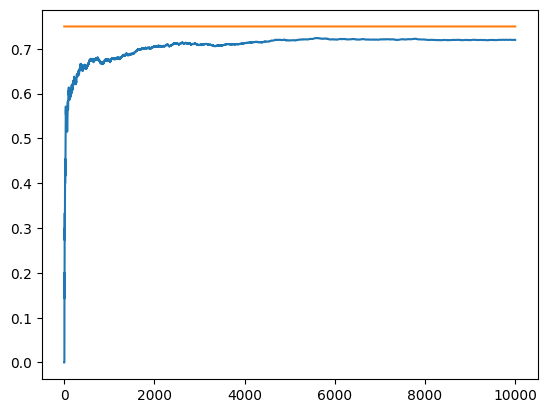

: 

In [4]:
experiment()
    